# 순환 신경망(Recurrent Neural Network, RNN)
- 여러 개의 데이터가 순서대로 입려되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법
- 기억된 데이터가 얼마나 중요한지 판단하고 별도의 가중치를 주어 다음 데이터로 넘어간다.

# LSTM(Long Short Term Memory)
- 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점 보완

# 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기
- 입력된 문장 의미를 파악하는 것은 곧 단어를 종합해 하나의 카테고리로 분류하는 작업

In [18]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

In [19]:
# 불러온 데이터를 학습셋과 데이터셋으로 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [20]:
# 데이터를 확인한 후 출력해 보겠습니다.
import numpy as np

catrgory = np.max(y_train) + 1
print(catrgory, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) # 딥러닝은 단어를 그대로 사용하지 않고 숫자로 변환한 후 학습

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [21]:
from tensorflow.keras.preprocessing import sequence

# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=100) # 단어 수를 100개로 맞추기
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [22]:
# 원-핫 인코딩 처리
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
# 모델의 구조를 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(1000, 100)) # 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알 수 있튼 형태로 변환
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [24]:
# 모델의 실행 옵션을 정하기
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test),
                   callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 55s 116ms/step - loss: 2.1260 - accuracy: 0.4530 - val_loss: 1.8253 - val_accuracy: 0.5183
Epoch 2/200
450/450 [==============================] - 48s 106ms/step - loss: 1.7923 - accuracy: 0.5289 - val_loss: 1.6990 - val_accuracy: 0.5752
Epoch 3/200
450/450 [==============================] - 49s 108ms/step - loss: 1.6009 - accuracy: 0.5858 - val_loss: 1.5960 - val_accuracy: 0.6046
Epoch 4/200
450/450 [==============================] - 47s 105ms/step - loss: 1.4284 - accuracy: 0.6290 - val_loss: 1.4274 - val_accuracy: 0.6340
Epoch 5/200
450/450 [==============================] - 45s 100ms/step - loss: 1.2957 - accuracy: 0.6748 - val_loss: 1.3459 - val_accuracy: 0.6576
Epoch 6/200
450/450 [==============================] - 47s 106ms/step - loss: 1.1860 - accuracy: 0.6973 - val_loss: 1.2886 - val_accuracy: 0.6723
Epoch 7/200
450/450 [==============================] - 50s 111ms/step - loss: 1.0931 - accuracy: 0.7231 - val_loss: 1.2735 -

# 전체코드 실습

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 불러온 데이터를 학습셋과 데이터셋으로 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인한 후 출력해 보겠습니다.
catrgory = np.max(y_train) + 1
print(catrgory, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) # 딥러닝은 단어를 그대로 사용하지 않고 숫자로 변환한 후 학습

# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=100) # 단어 수를 100개로 맞추기
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정
model = Sequential()
model.add(Embedding(1000, 100)) # 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알 수 있튼 형태로 변환
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test),
                   callbacks=[early_stopping_callback])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/200
450/450 [==============================] - 55s 115ms/step - loss: 2.1569 - accuracy: 0.4542 - val_loss: 1.7627 - val_accuracy: 0.5530
Epoch 2/200
450/450 [==============================] - 44s 99ms/step - loss: 1.7343 - accuracy: 0.5587 - val_loss: 1.7462 - val_accuracy: 0.5650
Epoch 3/200
450/450 [==============================] - 49s 109ms/step - loss: 1.5660 - accuracy: 0.6038 - val_loss: 1.5076 - val_accuracy: 0.6189
Epoch 4/200
450/450 [==============================] - 50s 110ms/step - loss: 1.4071 - accuracy: 0.6423 - val_loss: 1.4384 - val_accuracy: 0.6416
Epoch 5/200
450/450 [==========

NameError: name 'x_test' is not defined

71/71 [==============================] - 3s 40ms/step - loss: 1.2613 - accuracy: 0.7159

 Test Accuracy: 0.7159


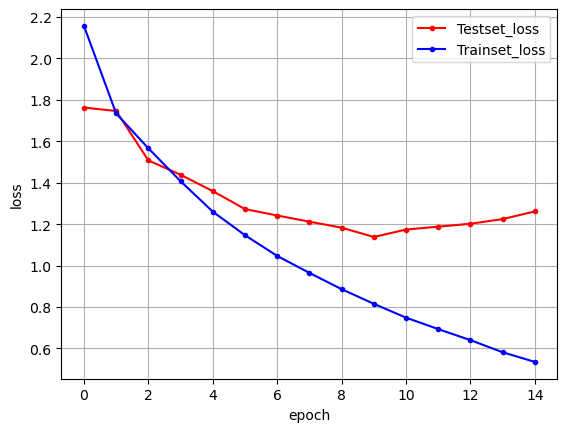

In [27]:
# 테스트 정확도를 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 2. LSTM과 CNN 조합을 이용한 영화 리뷰 분류하기

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [29]:
# 테스트셋을 지정
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

17464789/17464789 [==============================] - 6s 0us/step


In [34]:
# 모델의 구조를 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 55)                26400     
                                                                 
 dense_7 (Dense)             (None, 1)                 56        
                                                      

In [35]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# 학습의 조기 중단을 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [38]:
# 모델을 실행
history = model.fit(x_train, y_train, batch_size=40, epochs=100, validation_split=0.25,
                   callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 157s 327ms/step - loss: 0.4011 - accuracy: 0.8031 - val_loss: 0.2929 - val_accuracy: 0.8773
Epoch 2/100
469/469 [==============================] - 150s 320ms/step - loss: 0.2413 - accuracy: 0.9047 - val_loss: 0.2642 - val_accuracy: 0.8882
Epoch 3/100
469/469 [==============================] - 152s 323ms/step - loss: 0.1836 - accuracy: 0.9307 - val_loss: 0.2688 - val_accuracy: 0.8941
Epoch 4/100
469/469 [==============================] - 164s 349ms/step - loss: 0.1477 - accuracy: 0.9469 - val_loss: 0.2930 - val_accuracy: 0.8875
Epoch 5/100
469/469 [==============================] - 155s 330ms/step - loss: 0.1212 - accuracy: 0.9574 - val_loss: 0.3318 - val_accuracy: 0.8814


In [39]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 42s 54ms/step - loss: 0.3455 - accuracy: 0.8746

 Test Accuracy: 0.8746


In [40]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

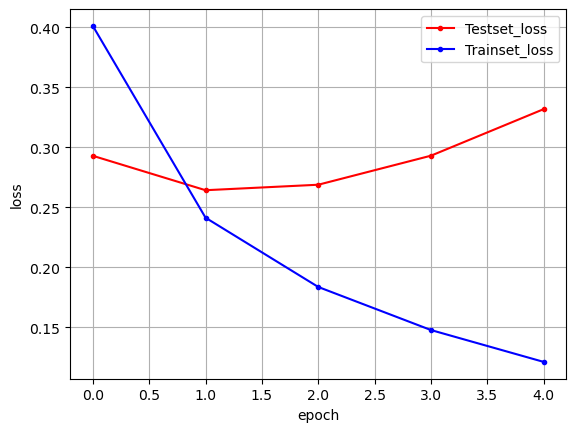

In [41]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 3. 어텐션을 사용한 신경망

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

# 테스트셋을 지정
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

# 모델의 구조를 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [45]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행
history = model.fit(x_train, y_train, batch_size=40, epochs=100, validation_split=0.25,
                   callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 963s 2s/step - loss: 0.4039 - accuracy: 0.8057 - val_loss: 0.2959 - val_accuracy: 0.8694
Epoch 2/100
469/469 [==============================] - 506s 1s/step - loss: 0.2217 - accuracy: 0.9137 - val_loss: 0.3113 - val_accuracy: 0.8728
Epoch 3/100
137/469 [=======>......................] - ETA: 5:45 - loss: 0.1527 - accuracy: 0.9438

KeyboardInterrupt: 

In [ ]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()